In [34]:
import pandas as pd
from altair import Chart, X, Y

In [24]:
ebola_df = pd.read_csv("data/out/ebola_outbreaks_before_2014-geometry_fixed.csv", encoding="utf-8", index_col=False)

ebola_data = ebola_df.drop(ebola_df.columns[[0, 1, 2, 9]], axis=1)

In [25]:
# Handle non-ASCII character
ebola_data = ebola_data.replace(u"C\xf4te d'Ivoire (Ivory Coast)", 
                                u"Cote d'Ivoire (Ivory Coast)")

In [27]:
ebola_data.columns

Index(['country_code_iso_2_digits', 'country_name', 'duration_days',
       'ebola_subtype', 'end_date', 'end_datetime', 'geometry',
       'geometry_geojson', 'latitude', 'longitude',
       'reported_number_of_deaths_among_cases',
       'reported_number_of_human_cases', 'reported_of_deaths_among_cases',
       'start_date', 'start_datetime', 'year_s'],
      dtype='object')

In [46]:
# TO FIX
outbrks_chart = Chart(data).mark_bar().encode(
                    X('country_name', type='nominal'),
                    Y('country_name', type='quantitative', aggregate='count')
                )

outbrks_chart

In [40]:
outbrks_data = ebola_data.groupby(["country_name"])["country_name"].count()

total_outbrks = ebola_data.groupby(["country_name"])["country_name"].count().sum()
outbrks_percent = outbrks_data.mul(100).truediv(total_outbrks)

data = outbrks_percent.to_frame(name='proportions of outbreaks (%)')

print(data)

                                  proportions of outbreaks (%)
country_name                                                  
Cote d'Ivoire (Ivory Coast)                           3.030303
Democratic Republic of the Congo                     27.272727
England                                               3.030303
Gabon                                                12.121212
Italy                                                 3.030303
Philippines                                           9.090909
Russia                                                6.060606
South Africa                                          3.030303
Sudan (South Sudan)                                   9.090909
USA                                                   9.090909
Uganda                                               15.151515


In [47]:
# Find a way to plot the % of outbreaks

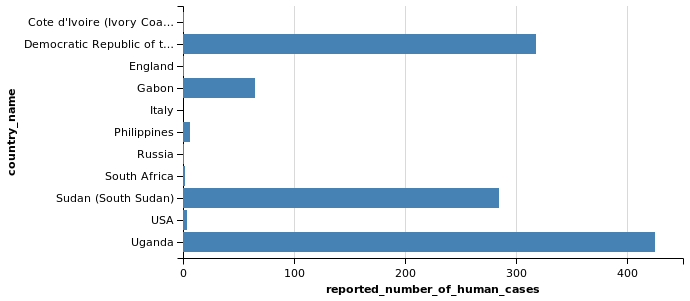

In [32]:
cases_chart1 = Chart(ebola_data).mark_bar().encode(
                    y='country_name',
                    x='reported_number_of_human_cases'
                )

cases_chart1

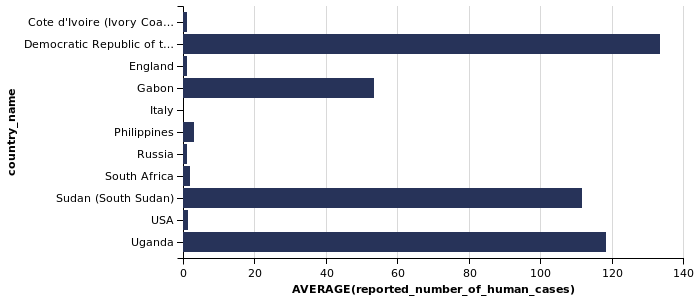

In [45]:
cases_chart2 = Chart(ebola_data).mark_bar(color='#273359').encode(
                    Y('country_name', type='nominal'),
                    X('reported_number_of_human_cases', type='quantitative', aggregate='average')
                )

cases_chart2